<a href="https://colab.research.google.com/github/sanjivyash/ML-Codes/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

In [0]:
image = plt.imread('yash.jpeg')
plt.imshow(image)

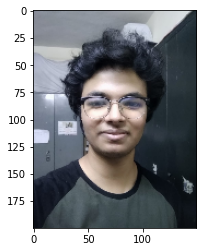

In [0]:
image = cv2.resize(image, (150,200))
img = image / 255.0
plt.imshow(image)

In [0]:
img.shape

(200, 150, 3)

In [0]:
class KMeans:

    def __init__(self, img, k):
        self.img = img
        self.k = k
        self.output = np.zeros((img.shape[0], img.shape[1]), dtype = np.int64)
        index = []

        for i in range(len(img.shape) - 1):
            l = np.random.choice(img.shape[i], self.k)
            index.append(l)

        self.centroids = img[index]

    def __call__(self):
        return self.image()

    def closest(self, i, j):
        dist = np.inf
        
        for ind, centroid in enumerate(self.centroids): 
            if np.linalg.norm(centroid - self.img[i][j]) < dist:
                dist = np.linalg.norm(centroid - self.img[i][j])
                self.output[i][j] = ind
        
    def update(self):
        self.output.fill(0)

        for i in range(self.img.shape[0]):
            for j in range(self.img.shape[1]):
                self.closest(i,j)

        count = np.zeros(self.centroids.shape[0])
        self.centroids.fill(0)
        
        for i in range(self.img.shape[0]):
            for j in range(self.img.shape[1]):
                self.centroids[self.output[i][j]] += self.img[i][j]
                count[self.output[i][j]] += 1

        self.centroids /= count.reshape(-1,1)

    def image(self):
        if(self.centroids is None):
            raise Exception("Feed the image first")

        prev = np.ones(self.centroids.shape)
        
        while not (prev == self.centroids).all():
            prev = self.centroids * 1
            self.update()
 
        result = np.zeros(self.img.shape)
      
        for i in range(result.shape[0]):
            for j in range(result.shape[1]):
                result[i][j] = self.centroids[self.output[i][j]] 

        return result

In [0]:
kmeans = KMeans(img, 4)
result = kmeans()

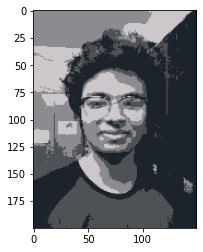

In [0]:
result *= 255
result = result.astype(np.uint8)
plt.imshow(result)

In [0]:
plt.imsave('Yash.png', result)